<a href="https://colab.research.google.com/github/kaushaln1/ML_DM_labs/blob/main/DM/DM_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer ,make_column_selector
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#/content/drive/MyDrive/Colab Notebooks/ZipDigits.train
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM2_data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM2_data/test.csv')

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,120,RL,30.0,9549,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,270000
1,2,45,RH,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,76000
2,3,60,RL,NaN,12394,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Family,225000
3,4,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,232000
4,5,20,RL,NaN,11616,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,139000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,128000
996,997,20,RL,60.0,6960,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,11,2009,WD,Normal,120500
997,998,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,245000
998,999,60,RL,NaN,11214,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,199900


*1. Type of data *

In [ ]:
column_map = {}


for column in df_train.columns:
    unique_vals = df_train[column].unique()
    data_type = df_train[column].dtype

    if len(unique_vals) == 2:
        column_map[column] = 'binary'
        continue

    if data_type == 'object' and len(unique_vals) > 2:
        column_map[column] = 'ordinal'
        continue

    if data_type in ['int64', 'float64']:
        column_map[column] = 'numerical'
        continue
column_map


# import csv

# df = pd.DataFrame(column_map.items(), columns=['Attribute', 'Type'])

# # Save DataFrame to a CSV file
# df.to_csv('attributes.csv', index=False)

{'Id': 'numerical',
 'MSSubClass': 'numerical',
 'MSZoning': 'ordinal',
 'LotFrontage': 'numerical',
 'LotArea': 'numerical',
 'Street': 'binary',
 'Alley': 'ordinal',
 'LotShape': 'ordinal',
 'LandContour': 'ordinal',
 'Utilities': 'binary',
 'LotConfig': 'ordinal',
 'LandSlope': 'ordinal',
 'Neighborhood': 'ordinal',
 'Condition1': 'ordinal',
 'Condition2': 'ordinal',
 'BldgType': 'ordinal',
 'HouseStyle': 'ordinal',
 'OverallQual': 'numerical',
 'OverallCond': 'numerical',
 'YearBuilt': 'numerical',
 'YearRemodAdd': 'numerical',
 'RoofStyle': 'ordinal',
 'RoofMatl': 'ordinal',
 'Exterior1st': 'ordinal',
 'Exterior2nd': 'ordinal',
 'MasVnrType': 'ordinal',
 'MasVnrArea': 'numerical',
 'ExterQual': 'ordinal',
 'ExterCond': 'ordinal',
 'Foundation': 'ordinal',
 'BsmtQual': 'ordinal',
 'BsmtCond': 'ordinal',
 'BsmtExposure': 'ordinal',
 'BsmtFinType1': 'ordinal',
 'BsmtFinSF1': 'numerical',
 'BsmtFinType2': 'ordinal',
 'BsmtFinSF2': 'numerical',
 'BsmtUnfSF': 'numerical',
 'TotalBsmtSF'

# Histogram
lotsize , house prices

Text(0.5, 0, 'House Prices')

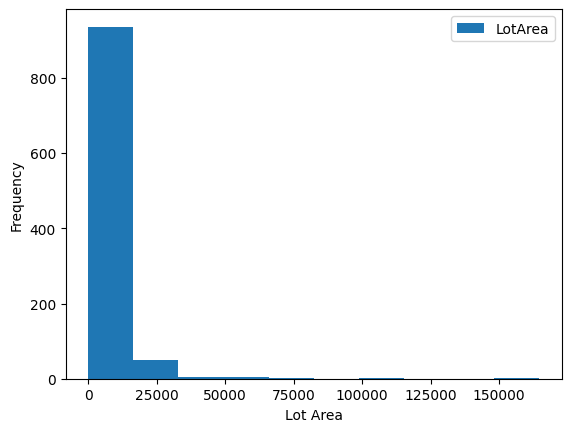

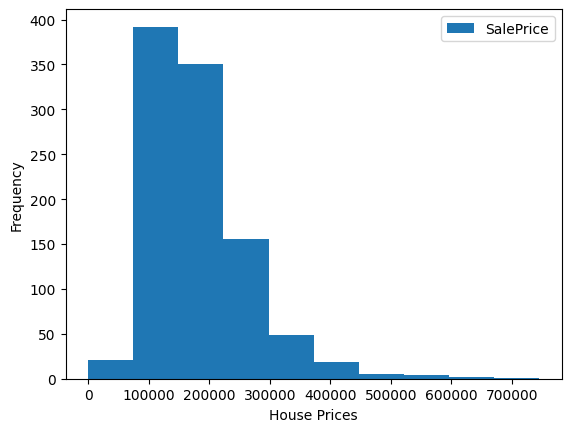

In [ ]:
#lotsizes = df_train['LotArea']
#
hist_1= df_train.plot.hist(column=["LotArea"], range=[0, max(df_train['LotArea'])]  ) # range is reduced
hist_1.set_xlabel("Lot Area")
hist_2 = df_train.plot.hist(column= ["SalePrice"])
hist_2.set_xlabel("House Prices")

# Box Plots

<Figure size 1200x600 with 0 Axes>

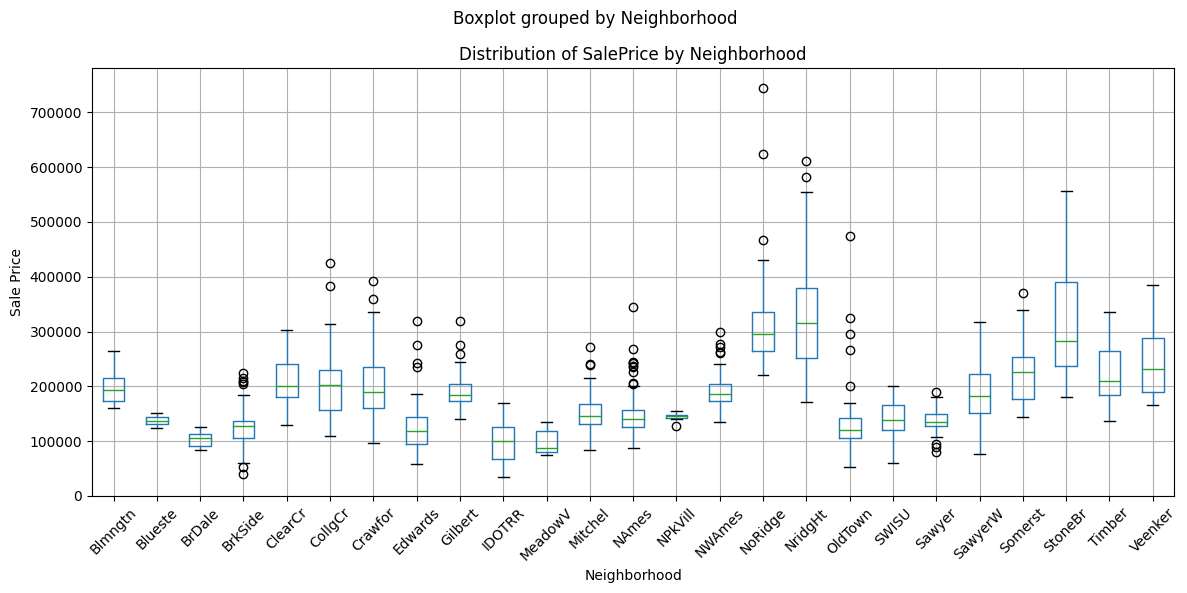

<Figure size 1000x600 with 0 Axes>

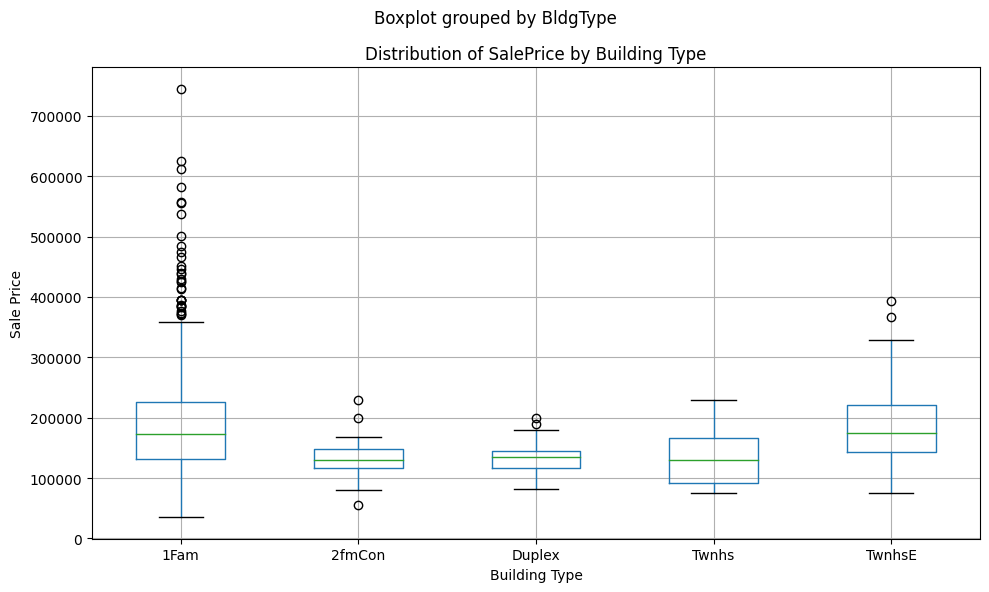

In [ ]:
plt.figure(figsize=(12, 6))
df_train.boxplot(column='SalePrice', by='Neighborhood', figsize=(12, 6), rot=45)
plt.title('Distribution of SalePrice by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

# Create a box plot for BldgType vs. SalePrice using Pandas boxplot
plt.figure(figsize=(10, 6))
df_train.boxplot(column='SalePrice', by='BldgType', figsize=(10, 6))
plt.title('Distribution of SalePrice by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

# Correlation

In [ ]:
# remove non ordinal data
drop_columns = []
for key, value in column_map.items():
    if isinstance(value, str) and "ordinal" not in value and key != 'SalePrice':
        drop_columns.append(key)


df_train_filtered = df_train.drop(columns=drop_columns)
#df_train_filtered = df_train_filtered.dropna()

correlation_results = pd.DataFrame(columns=['Column', 'Spearman_corr', 'Spearman_pval'])

for column in df_train_filtered.columns:
    if column != 'SalePrice':
        spearman_corr, spearman_pval = spearmanr(df_train_filtered[column], df_train_filtered['SalePrice'])
        correlation_frame = pd.DataFrame({
            'Column': [column],
            'Spearman_corr': [spearman_corr],
            'Spearman_pval': [spearman_pval]
        })
        correlation_results = pd.concat([correlation_results, correlation_frame], ignore_index=True)

print(correlation_results)






           Column  Spearman_corr  Spearman_pval
0        MSZoning      -0.328412   1.411646e-26
1           Alley            NaN            NaN
2        LotShape      -0.301505   1.839253e-22
3     LandContour       0.015046   6.346236e-01
4       LotConfig      -0.067799   3.205084e-02
5       LandSlope       0.028327   3.708760e-01
6    Neighborhood       0.183473   5.085623e-09
7      Condition1       0.191524   1.024453e-09
8      Condition2       0.050832   1.081718e-01
9        BldgType      -0.129760   3.860655e-05
10     HouseStyle       0.246586   2.564927e-15
11      RoofStyle       0.153103   1.149211e-06
12       RoofMatl       0.088537   5.081890e-03
13    Exterior1st       0.066351   3.591516e-02
14    Exterior2nd       0.071779   2.321035e-02
15     MasVnrType            NaN            NaN
16      ExterQual      -0.643588  4.987498e-118
17      ExterCond       0.130620   3.425344e-05
18     Foundation       0.507092   1.896375e-66
19       BsmtQual            NaN        

In [ ]:
# heat map
import numpy as np


correlation_matrix = np.zeros((len(df_train_filtered.columns), len(df_train_filtered.columns)))
p_values = np.ones((len(df_train_filtered.columns), len(df_train_filtered.columns)))

for i, col1 in enumerate(df_train_filtered.columns):
    for j, col2 in enumerate(df_train_filtered.columns):
        if i != j:
            spearman_corr, p_value = spearmanr(df_train_filtered[col1], df_train_filtered[col2])
            correlation_matrix[i, j] = spearman_corr
            p_values[i, j] = p_value


alpha = 0.01
significant_corr_mask = (p_values < alpha) & (p_values != 0)


significant_corr_matrix = np.where(significant_corr_mask, correlation_matrix, np.nan)



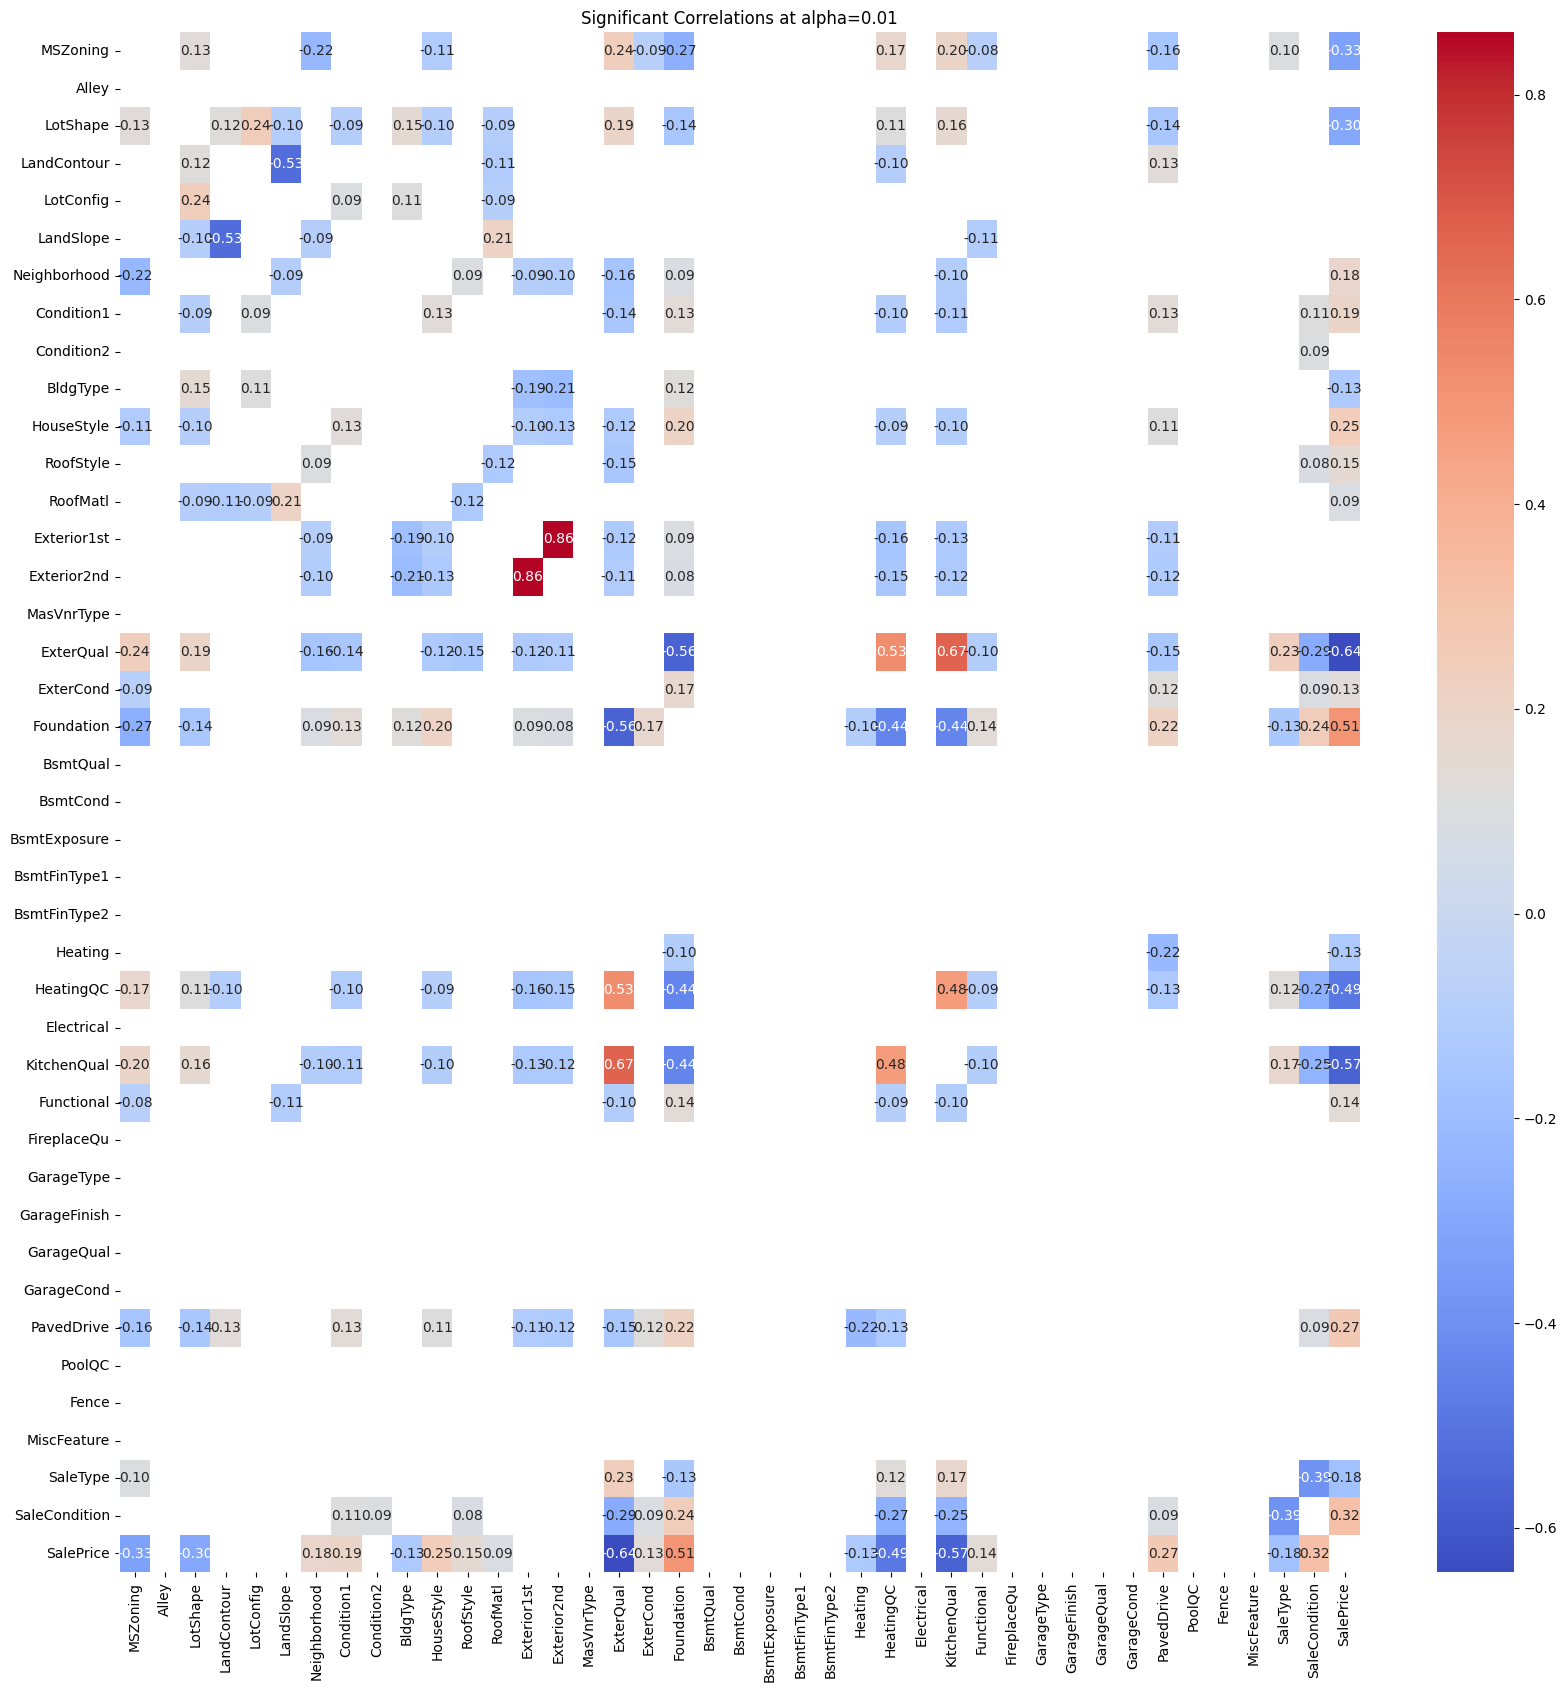

In [ ]:
# heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(significant_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=df_train_filtered.columns, yticklabels=df_train_filtered.columns)
plt.title(f'Significant Correlations at alpha={alpha}')
plt.show()

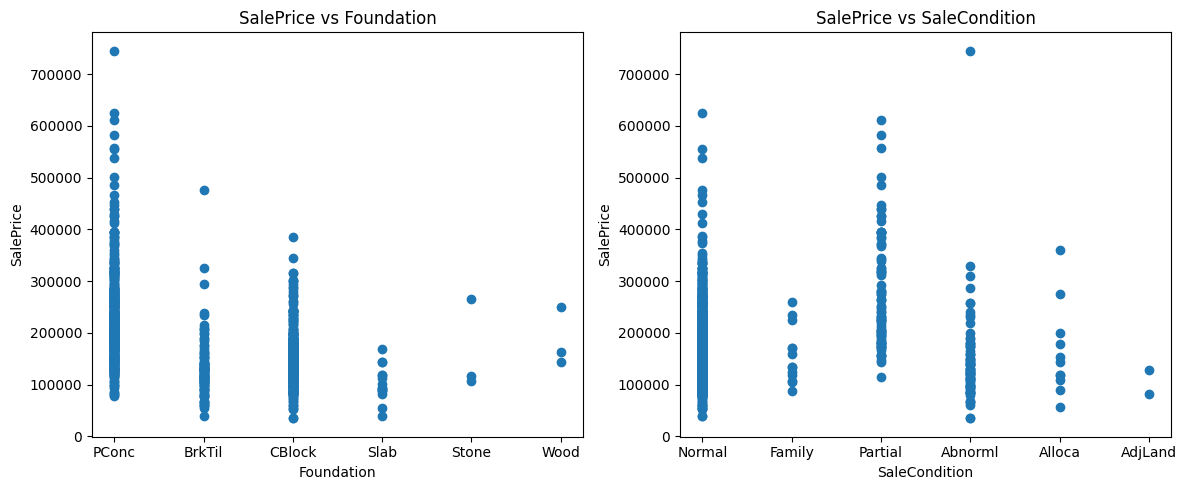

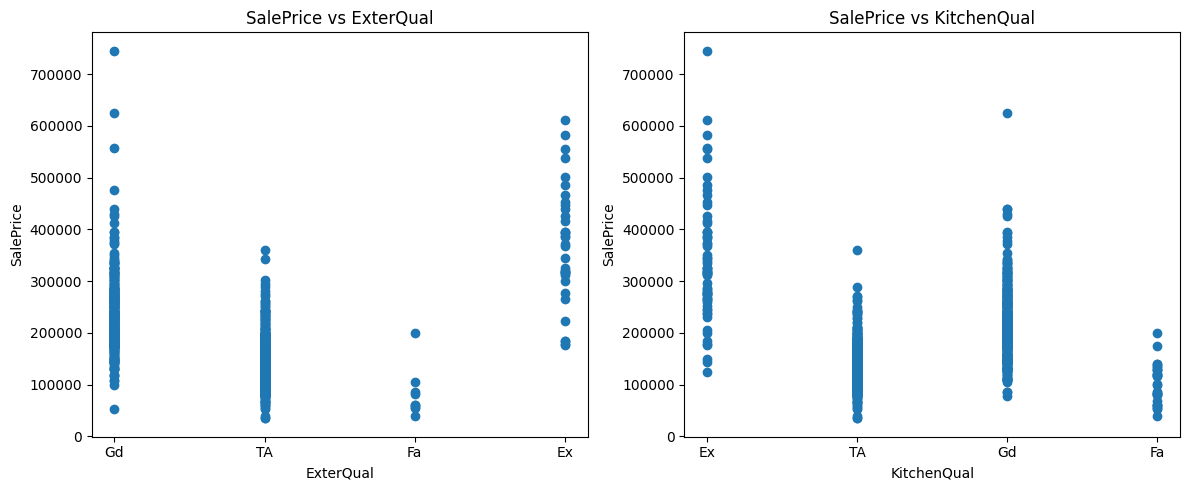

In [ ]:
first_max_index = correlation_results['Spearman_corr'].idxmax()
second_max_index = correlation_results['Spearman_corr'].drop(first_max_index).idxmax()

# Get corresponding names for the 1st and 2nd maximum values
positive_attr1 = correlation_results.loc[first_max_index, 'Column']
positive_attr2 = correlation_results.loc[second_max_index, 'Column']


# Get corresponding names for the 1st and 2nd smallest values

first_min_index = correlation_results['Spearman_corr'].idxmin()
second_min_index = correlation_results['Spearman_corr'].drop(first_min_index).idxmin()
negative_attr1 = correlation_results.loc[first_min_index, 'Column']
negative_attr2 = correlation_results.loc[second_min_index, 'Column']



plt.figure(figsize=(12, 5))

'
plt.subplot(1, 2, 1)
plt.scatter(df_train_filtered[positive_attr1], df_train_filtered['SalePrice'])
plt.xlabel(positive_attr1)
plt.ylabel('SalePrice')
plt.title(f'SalePrice vs {positive_attr1}')

plt.subplot(1, 2, 2)
plt.scatter(df_train_filtered[positive_attr2], df_train_filtered['SalePrice'])
plt.xlabel(positive_attr2)
plt.ylabel('SalePrice')
plt.title(f'SalePrice vs {positive_attr2}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_train_filtered[negative_attr1], df_train_filtered['SalePrice'])
plt.xlabel(negative_attr1)
plt.ylabel('SalePrice')
plt.title(f'SalePrice vs {negative_attr1}')

plt.subplot(1, 2, 2)
plt.scatter(df_train_filtered[negative_attr2], df_train_filtered['SalePrice'])
plt.xlabel(negative_attr2)
plt.ylabel('SalePrice')
plt.title(f'SalePrice vs {negative_attr2}')

plt.tight_layout()
plt.show()

# Normalize

In [ ]:
# normalize numerical attributes
numerical_atrributes = []
for key, value in column_map.items():
        if value == 'numerical':
          numerical_atrributes.append(key)
numerical_atrributes
df_train_norm_filtered = df_train.filter(numerical_atrributes, axis=1)
df_train_norm_filtered
df_tb_nor = df_train_norm_filtered.dropna()

d= preprocessing.normalize(df_tb_nor[numerical_atrributes], axis=0) # normalizing all attributes
normalised_train_data = pd.DataFrame(d, columns=df_tb_nor.columns)


# normalize test data
df_test_norm_filtered = df_test.filter(numerical_atrributes, axis=1)

df_test_nor = df_test_norm_filtered.dropna()

d= preprocessing.normalize(df_test_nor[numerical_atrributes], axis=0) # normalizing all attributes
normalised_test_data = pd.DataFrame(d, columns=df_test_nor.columns)
normalised_test_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.000200,0.015492,0.056154,0.039590,0.050746,0.046762,0.052682,0.052327,0.097490,0.081059,...,0.000000,0.000000,0.000000,0.0,0.156461,0.0,0.000000,0.046495,0.053078,0.044522
1,0.000401,0.069713,0.054751,0.023488,0.059203,0.046762,0.053759,0.053423,0.050382,0.102025,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.085241,0.053078,0.055331
2,0.001002,0.139426,0.024568,0.012226,0.050746,0.046762,0.053974,0.053610,0.020153,0.035775,...,0.000000,0.018212,0.000000,0.0,0.000000,0.0,0.000000,0.046495,0.053078,0.039695
3,0.001603,0.023238,0.039308,0.029809,0.042288,0.056114,0.051875,0.052139,0.000000,0.000000,...,0.000000,0.000000,0.102329,0.0,0.000000,0.0,0.000000,0.023247,0.053131,0.030844
4,0.001803,0.046475,0.067385,0.037621,0.076118,0.046762,0.054055,0.053690,0.038794,0.072953,...,0.000000,0.066342,0.000000,0.0,0.000000,0.0,0.000000,0.054244,0.053105,0.089849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.090966,0.054221,0.056154,0.055094,0.050746,0.074819,0.052009,0.052139,0.000000,0.039204,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.054244,0.053026,0.064101
351,0.091166,0.092951,0.022462,0.014971,0.050746,0.046762,0.053786,0.053423,0.111597,0.093607,...,0.000000,0.129432,0.000000,0.0,0.000000,0.0,0.000000,0.023247,0.053026,0.041170
352,0.091567,0.038729,0.052645,0.151707,0.050746,0.074819,0.051363,0.053396,0.000000,0.000000,...,0.170558,0.026016,0.000000,0.0,0.142608,0.0,0.000000,0.069742,0.053078,0.064370
353,0.091967,0.054221,0.046327,0.030082,0.059203,0.084171,0.052252,0.053637,0.000000,0.021434,...,0.000000,0.039025,0.000000,0.0,0.000000,0.0,0.655383,0.038746,0.053131,0.071477


# Regression

In [ ]:
# using numerical attributes
X_train = normalised_train_data.drop(columns=['SalePrice'])
y_train = normalised_train_data['SalePrice']

X_test = normalised_test_data.drop(columns=['SalePrice'])
y_test = normalised_test_data['SalePrice']

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# create csv with
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.005790614897923641
R-squared (R2): -12.174843128511187


In [ ]:
# with all attributes
import numpy as np
#get ordinal and binary attributes
ordinal_cols = []
for key, value in column_map.items():
        if value != 'numerical':
          ordinal_cols.append(key)
ordinal_categories = [df_train[col].unique().tolist() for col in ordinal_cols]
ordinal_categories = [[value if pd.notnull(value) else '-1' for value in sublist] for sublist in ordinal_categories]
ordinal_cols = ordinal_cols
numerical_cols = numerical_atrributes


ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)


preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, ordinal_cols),
        ('numerical', 'passthrough',
         make_column_selector(dtype_include=np.number))
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

df_train[numerical_cols].fillna(0)
X_train = df_train.drop(columns=['SalePrice'])
y_train = df_train['SalePrice']
X_train = df_train.fillna('-1')

df_test[numerical_cols].fillna(0)
X_test = df_test.drop(columns=['SalePrice'])
X_test = df_test[df_test.RoofMatl != 'ClyTile']
X_test = X_test.fillna('-1')
X_test = X_test[~(X_test == 'Po').any(axis=1)]
X_test = X_test[~(X_test == 'TenC').any(axis=1)]


y_test = df_test
y_test = y_test[~(y_test == 'ClyTile').any(axis=1)]
y_test = y_test[~(y_test == 'Po').any(axis=1)]
y_test = y_test[~(y_test == 'TenC').any(axis=1)]
y_index = y_test['Id'].reset_index()
y_test = y_test['SalePrice']

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y1_pred = model.predict(X_train)

mse1 = mean_squared_error(y_train, y1_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_train, y1_pred)

In [ ]:
print(f"Mean Squared Error (MSE): {mse1}")
print(f"R-squared (R2): {r2}")

i = pd.DataFrame(y_pred).reset_index()
result = pd.concat([y_index, i], axis = 1 )
result = result.drop(columns=['index'])
#result['Id','0'].to_csv('res.csv')

Mean Squared Error (MSE): 4.55227269589983e-21
R-squared (R2): 1.0


In [ ]:
ordinal_categories

[['RL', 'RH', 'RM', 'FV', 'C (all)'],
 ['Pave', 'Grvl'],
 ['-1', 'Grvl', 'Pave'],
 ['IR1', 'Reg', 'IR3', 'IR2'],
 ['Lvl', 'HLS', 'Bnk', 'Low'],
 ['AllPub', 'NoSeWa'],
 ['CulDSac', 'Corner', 'Inside', 'FR2', 'FR3'],
 ['Gtl', 'Mod', 'Sev'],
 ['Veenker',
  'SawyerW',
  'Gilbert',
  'Somerst',
  'Sawyer',
  'CollgCr',
  'StoneBr',
  'NAmes',
  'OldTown',
  'NridgHt',
  'Mitchel',
  'NoRidge',
  'Timber',
  'BrkSide',
  'BrDale',
  'ClearCr',
  'Blmngtn',
  'Edwards',
  'IDOTRR',
  'SWISU',
  'Crawfor',
  'NWAmes',
  'NPkVill',
  'MeadowV',
  'Blueste'],
 ['Norm', 'RRAn', 'Artery', 'Feedr', 'PosN', 'PosA', 'RRNe', 'RRAe', 'RRNn'],
 ['Norm', 'Feedr', 'PosA', 'RRAn', 'PosN', 'RRAe', 'Artery', 'RRNn'],
 ['TwnhsE', '1Fam', '2fmCon', 'Duplex', 'Twnhs'],
 ['1Story',
  '1.5Unf',
  '2Story',
  '1.5Fin',
  'SLvl',
  'SFoyer',
  '2.5Unf',
  '2.5Fin'],
 ['Hip', 'Gable', 'Flat', 'Gambrel', 'Shed', 'Mansard'],
 ['CompShg', 'Tar&Grv', 'WdShngl', 'WdShake', 'Metal', 'Roll', 'Membran'],
 ['BrkFace',
  'Wd 